## **CSE 521 Machine Learning**
**Term Project - Lung Cancer Risk Prediction Using Patient Demographics and Health Indicators**

**Goal**: Our goal is to create an advanced model to predict lung cancer risk, leveraging a dataset that encompasses various patient attributes such as gender, age, smoking history, and a range of health-related indicators.

**Participants:**

# Md. Aktaruzzaman (2023-2-96-013)

# Raisul Islam (2023-2-96-020)

We are loading the dataset from Kaggle to this Google Colab environments directly. For this, we used the kaggle.json file (that contains the API key and kaggle username)

# **01. Importing Libraries and Loading dataset**

In [177]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))

In [2]:
from google.colab import files
uploaded = files.upload()

Saving survey lung cancer.csv to survey lung cancer.csv


In [194]:
df = pd.read_csv(r"survey lung cancer.csv")
df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO  
4                    2                      1           1          NO

# **About the dataset**

The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status.

Attribute information: Total no. of attributes: 16 No .of instances: 284

Gender: M(male), F(female) Age: Age of the patient Smoking: YES=2 , NO=1. Yellow fingers: YES=2 , NO=1. Anxiety: YES=2 , NO=1. Peer_pressure: YES=2 , NO=1. Chronic Disease: YES=2 , NO=1. Fatigue: YES=2 , NO=1. Allergy: YES=2 , NO=1. Wheezing: YES=2 , NO=1. Alcohol: YES=2 , NO=1. Coughing: YES=2 , NO=1. Shortness of Breath: YES=2 , NO=1. Swallowing Difficulty: YES=2 , NO=1. Chest pain: YES=2 , NO=1. Lung Cancer: YES , NO.

# **02. Understanding Our Data**

In [195]:
df.shape

(309, 16)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [181]:
df.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.497588   
min           1.000000    1.000000    1.000000    1.000000           1.000000   
25%           1.000000    1.000000    1.000000    1.000000           1.000000   
50%           2.000000    2.000000    2.000000    2.000000           2.000000   
75%           2.000000    2.000000    2.000000    2.000000           2.000000   
max           2.000000    2.000000    2.000000    2.000000           2.000000   

         COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
count  309.000000           309.000000             309.000000  309.000000  
mean     1.579288             1.640777               1.469256    1.556634  
std      0.494474             0.480551               0.499863    0.497588  
min      1.000000             1.000000               1.000000    1.000000  
25%      1.000000             1.000000               1.000000    1.000000  
50%      2.000000             2.000000               1.000000    2.000000  
75%      2.000000             2.000000               2.000000    2.000000  
max      2.000000             2.000000               2.000000    2.000000

# **Here we can observe the following:**

AGE - The dataset is mostly of elderly people with mean and median both around 62 years. Although low age groups are also present. Minimum being - 21 years.

SMOKING - The dataset is mostly composed of people who smokes. Inferred from mean. As values are either 1 or 2 mean should be 1.5 if perfectly balanced.

YELLOW_FINGERS - The dataset is mostly composed of people with yellow fingers. Inferred from mean.

ANXIETY - The dataset is balanced in this regard.

PEER_PRESSURE - The dataset is balanced in this regard.

CHRONIC_DISEASE - The dataset is balanced in this regard.

FATIGUE - The dataset mostly composes of people with signs of fatigueness.

ALLERGY - The dataset mostly composes of people with allergy.

WHEEZING - The dataset mostly composes of people with wheezing symptom.

ALCOHOL CONSUMING - The dataset mostly composes of people who consumes alcohol.

COUGHING - The dataset mostly composes of people with coughing symptom.

SHORTNESS OF BREATH - The dataset mostly composes of people with shortness of breath.

SWALLOWING DIFFICULTY - The dataset mostly composes of people with not having difficulty with swallowing.

CHEST PAIN - The dataset mostly composes of people with chest pain.

Will confirm these observations in the EDA section

In [196]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [197]:
df.duplicated().sum()

33

**We have 33 duplicate values in our dataset. Let's drop these rows!**

In [198]:
df.drop_duplicates(inplace=True)

In [199]:
df.shape

(276, 16)

# **Encoding of Categorical Columns**

A short preprocessing step before we move on to Exploratory Data Analysis for easy implementation of graphs. Here we are encoding LUNG_CANCER and GENDER column.

In [200]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['LUNG_CANCER']= encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2                      2           2            1  
1                    2                      2           2            1  
2                    2                      1           2            0  
3                    1                      2           2            0  
4                    2                      1           1            0

# **03. Exploratory Data Analysis**

In [201]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

In [202]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(10,5))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=10)
plt.show()

In [203]:
fig,ax = plt.subplots(15,2,figsize=(20,60))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=10)

Text(0.5, 0.98, 'Visualizing Categorical Columns')

In [204]:
fig,ax = plt.subplots(15,3,figsize=(20,60))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,1],hue=df['LUNG_CANCER'])
    sns.violinplot(x=df[i],y=df['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns",fontsize=10)

Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

In [205]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

<Axes: >

**Observations**

There is multicollinearity present in the data.

# **04. Data Preprocessing**
Separating Independent and Dependent Features

In [206]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

**Changing values of columns from 2,1 to 1,0**

In [207]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        0               1        1              0   
1       1   74        1               0        0              0   
2       0   59        0               0        0              1   
3       1   63        1               1        1              0   
4       0   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         1                  1         1   
1                1         1         1         0                  0         0   
2                0         1         0         1                  0         1   
3                0         0         0         0                  1         0   
4                0         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                    1                      1           1  
1                    1                      1           1  
2                    1                      0           1  
3                    0                      1           1  
4                    1                      0           0

**Oversampling of Minority Class**

In [208]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

**Train Test Split**

In [209]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


**Scaling of AGE column**

In [212]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
321       0 -0.587072        0               0        0              0   
336       0 -0.378737        0               0        0              0   
334       1 -0.274570        0               0        0              1   
151       0  0.246267        1               1        0              1   
314       0 -0.587072        0               0        0              0   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
321                1         0         0         1                  0   
336                0         1         0         0                  0   
334                0         1         0         1                  0   
151                1         0         0         0                  0   
314                1         0         0         1                  0   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
321         0                    1                      1           0  
336         0                    1                      0           0  
334         0                    1                      0           1  
151         0                    0                      0           0  
314         0                    1                      1           0

# **05. Model Building**

In [213]:
#Model Building
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# **i. KNeighbors Classifier - 78%**

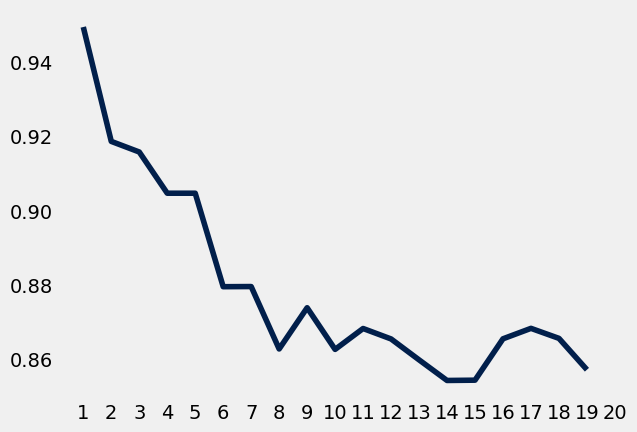

In [214]:
#KNN
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       1.00      0.86      0.93        59

    accuracy                           0.93       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.94      0.93      0.93       119



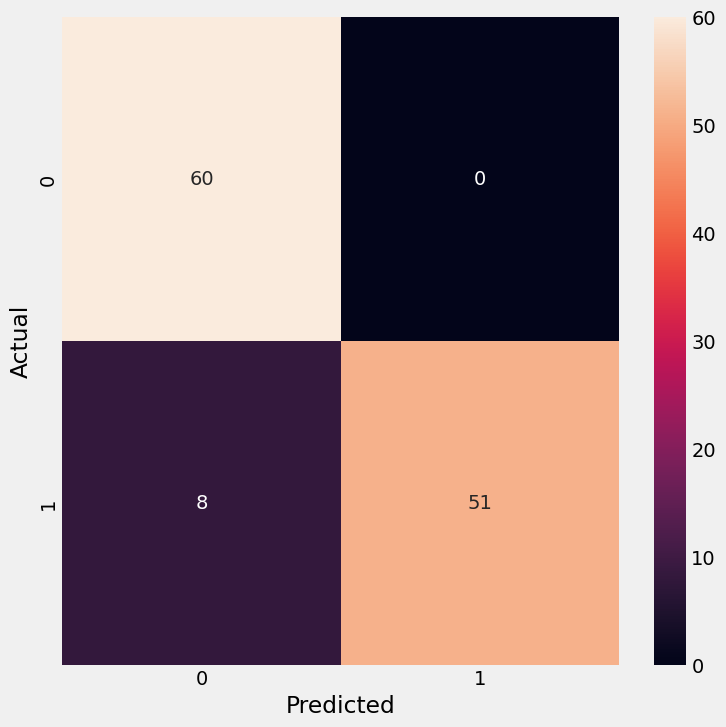

In [215]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

# **ii. Support Vector Machine - 98%**

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119


Best Parameters of SVC model is : {'gamma': 100, 'C': 100}



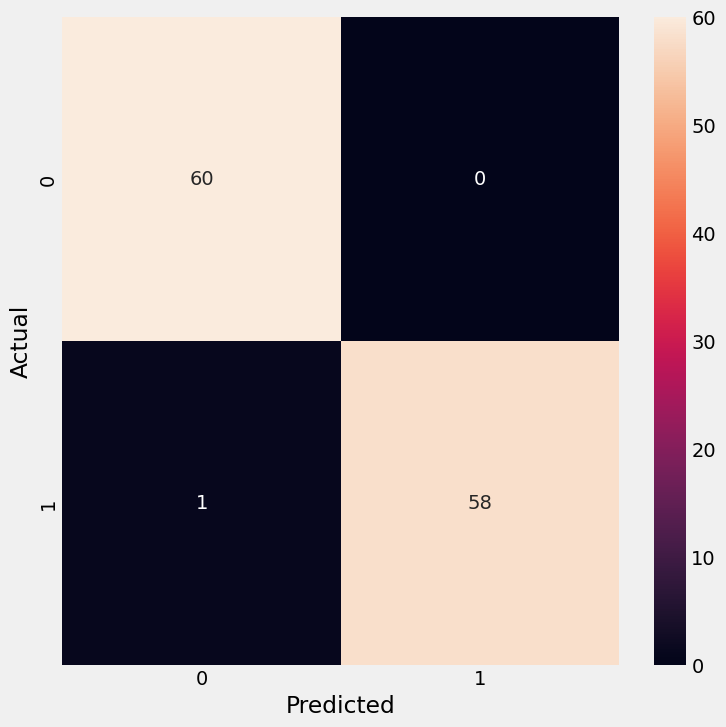

In [217]:
#SVM
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

# **iii. Logistic Regression - 85%**

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        60
           1       0.98      0.85      0.91        59

    accuracy                           0.92       119
   macro avg       0.92      0.92      0.92       119
weighted avg       0.92      0.92      0.92       119



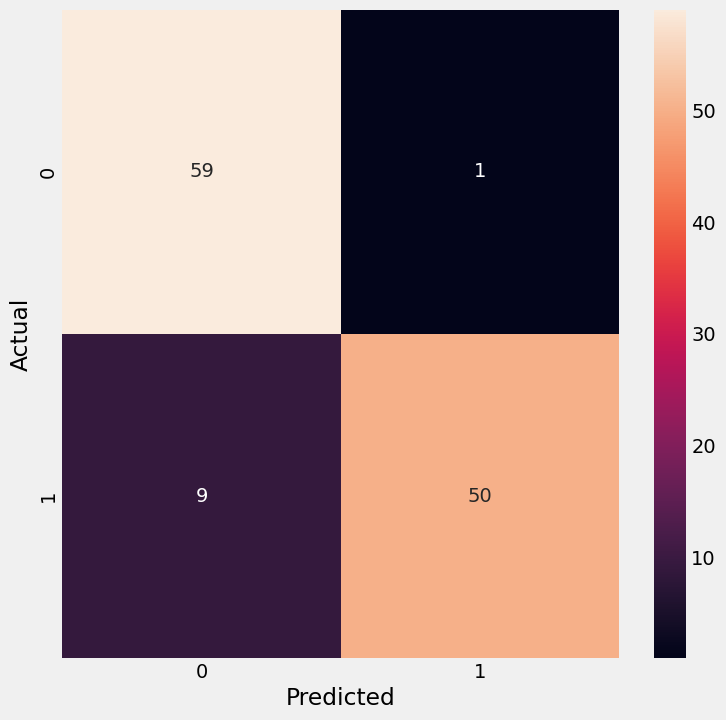

In [218]:
#Logistic Regression

param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

# **iv. Random Forest Classifier - 88%**

              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119


Best Parameter: {'n_estimators': 100}



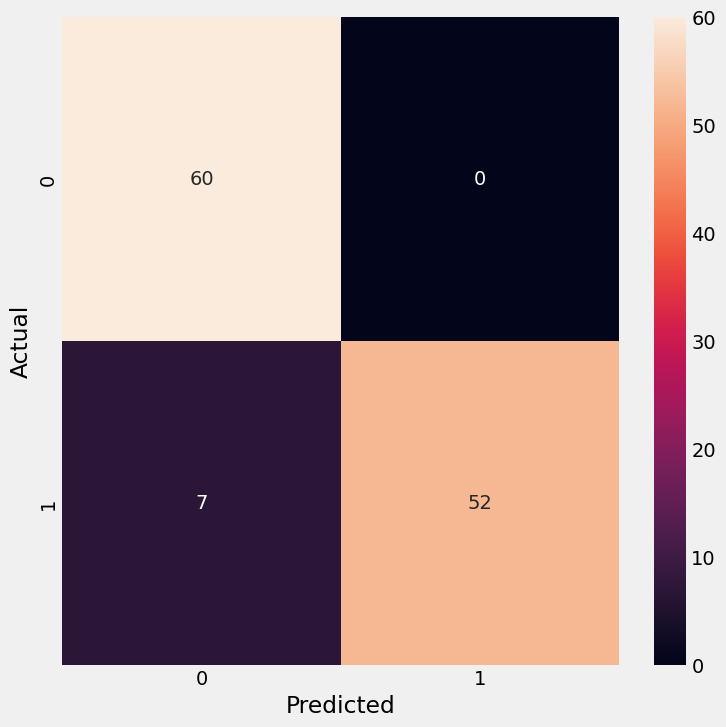

In [220]:
#Random Forest Classifier

param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

# **v. Gradient Boosting Classifier - 88%**

              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119


Best Parameter: {'n_estimators': 50, 'learning_rate': 1}



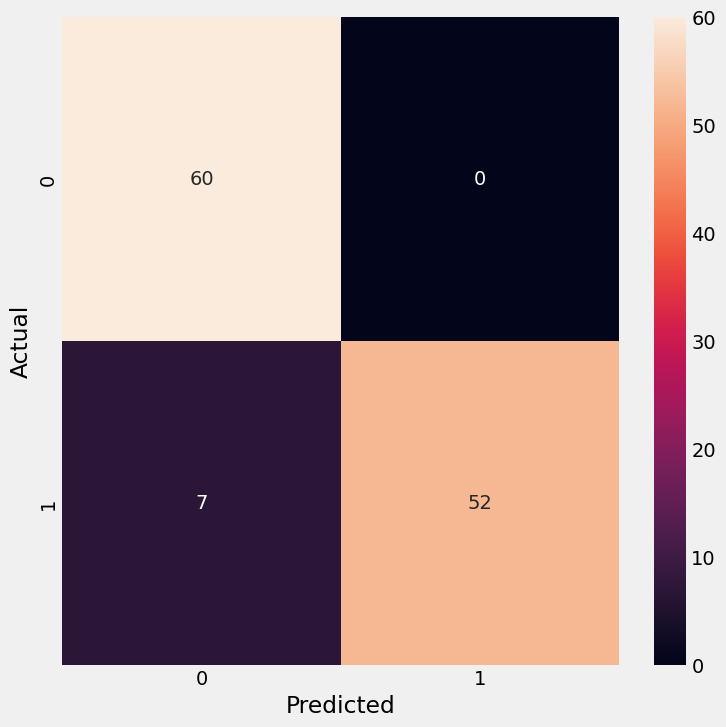

In [221]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

# **vi. LGBM Classifier - 90%**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 179, number of negative: 178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 357, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501401 -> initscore=0.005602
[LightGBM] [Info] Start training from score 0.005602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

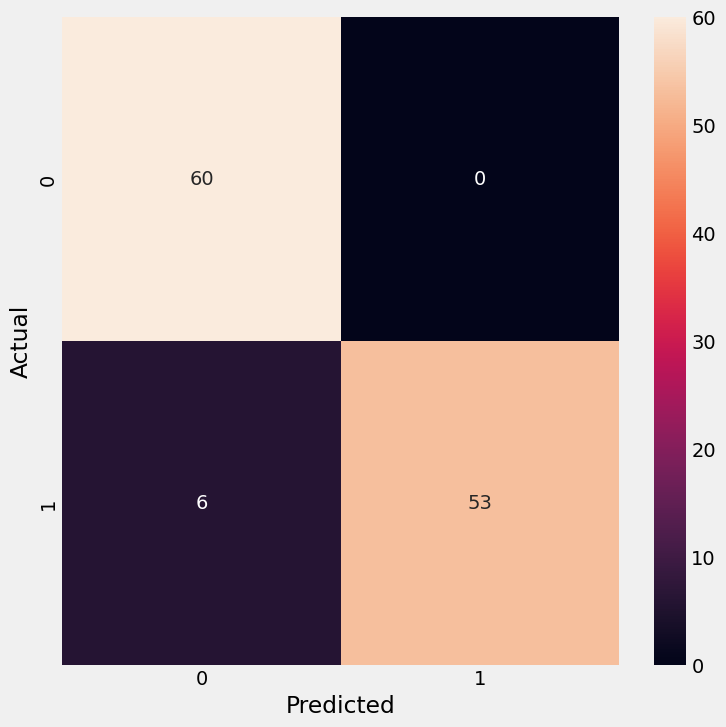

In [222]:
#LGBM classifier

import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

# **vii. Artificial Neural Networks -88%**

In [223]:
# Artificial Neural Networks

from keras.models import Sequential
from keras.layers import Dense
modell = Sequential()
modell.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))  # Input layer and hidden layer
modell.add(Dense(8, activation='relu'))  # Additional hidden layer
modell.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


In [224]:
modell.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [171]:
modell.fit(X_train, y_train, epochs=400, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/400
36/36 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.5812 - val_accuracy: 0.9328
Epoch 2/400
36/36 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.5870 - val_accuracy: 0.9328
Epoch 3/400
36/36 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.5915 - val_accuracy: 0.9328
Epoch 4/400
36/36 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.5943 - val_accuracy: 0.9328
Epoch 5/400
36/36 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.5967 - val_accuracy: 0.9328
Epoch 6/400
36/36 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.5965 - val_accuracy: 0.9328
Epoch 7/400
36/36 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.5999 - val_accuracy: 0.9328
Epoch 8/400
3

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119



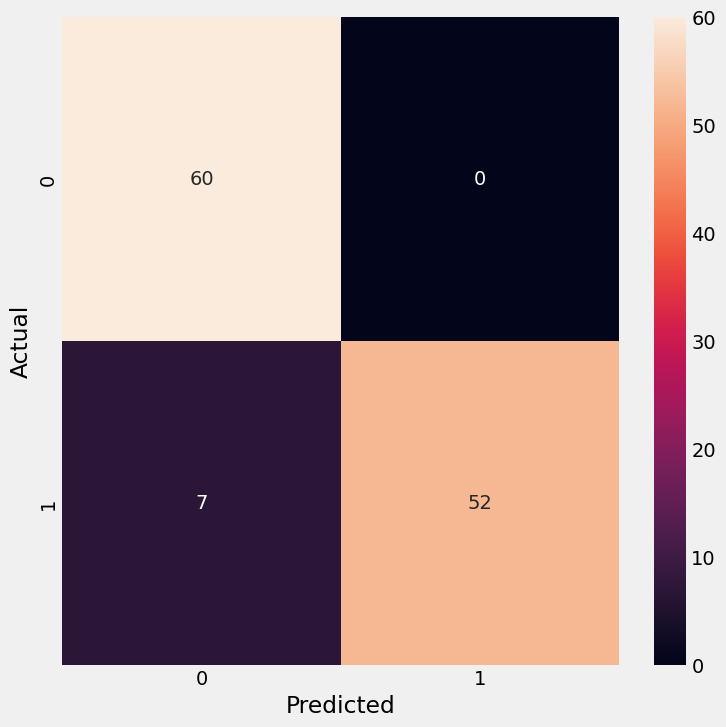

In [172]:
y_pred = modell.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

confusion_matrixx = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrixx, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **👉 | Selected Model - SVC**

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



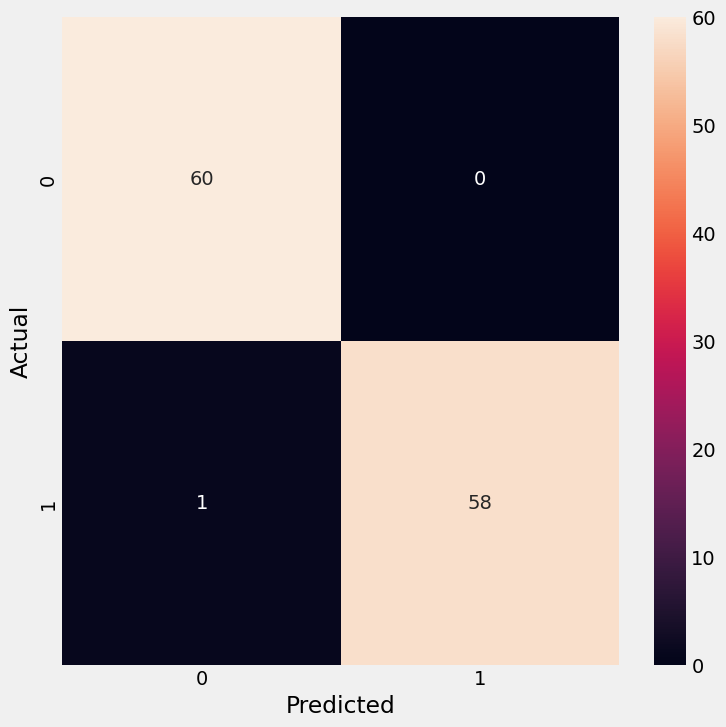

In [225]:
#selected Model - SVM

model = SVC(gamma=100,C=100)
model.fit(X_train,y_train)
y_pred_svc=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

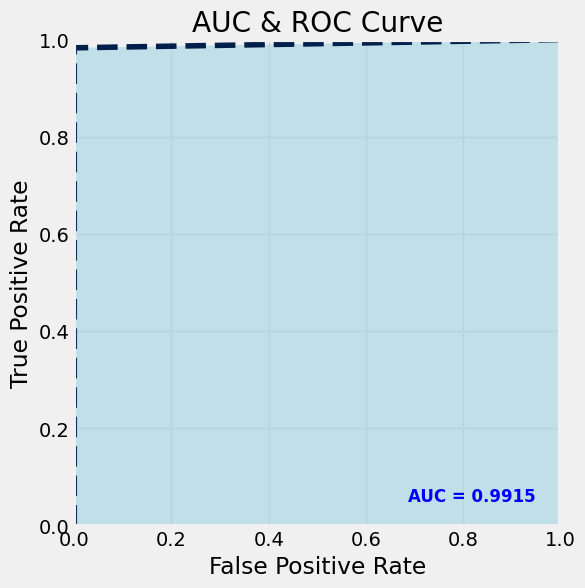

In [226]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_svc)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_svc)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# **Conclusion**

Support Vector Machine is selected.
* **Recall** - 98%
* **Accuracy** - 99%
* It has only one missclassification.¶
* **AUC** - 0.9915